In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

pokedex = pd.read_csv('pokemon_alopez247.csv')
pokedex


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


In [49]:
print(pokedex.Type_1)
tipo1 = pokedex.Type_1

encoder = LabelEncoder()
tipo1 = encoder.fit_transform(tipo1)

tipo1

0        Grass
1        Grass
2        Grass
3         Fire
4         Fire
        ...   
716       Dark
717     Dragon
718       Rock
719    Psychic
720       Fire
Name: Type_1, Length: 721, dtype: object


array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

In [50]:
print(pokedex.Type_2)
tipo2 = pokedex.Type_2

encoder = LabelEncoder()
tipo2 = encoder.fit_transform(tipo2)

tipo2

0      Poison
1      Poison
2      Poison
3         NaN
4         NaN
        ...  
716    Flying
717    Ground
718     Fairy
719     Ghost
720     Water
Name: Type_2, Length: 721, dtype: object


array([13, 13, 13, 18, 18,  7, 18, 18, 18, 18, 18,  7, 13, 13, 13,  7,  7,
        7, 18, 18,  7,  7, 18, 18, 18, 18, 18, 18, 18, 18, 10, 18, 18, 10,
       18, 18, 18, 18,  4,  4,  7,  7, 13, 13, 13,  9,  9, 13, 13, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  5, 18, 18, 18, 18, 18, 18,
       13, 13, 13, 13, 13, 10, 10, 10, 18, 18, 14, 14, 16, 16,  7,  7,  7,
       18, 11, 18, 18, 18, 11, 13, 13, 13, 10, 18, 18, 18, 18, 18, 18, 14,
       14, 18, 18, 18, 18, 18, 18, 18, 15, 15, 18, 18, 18, 18, 18, 18, 18,
       18, 14,  4,  7, 14, 18, 18, 18, 18, 18,  7, 11, 18, 18, 18, 18, 18,
       18, 17, 17, 17, 17,  7, 18,  7,  7,  7, 18, 18,  7, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18,  7,  7,  7,  7, 13, 13,  7,  3,
        3, 18, 18,  4, 18,  7,  7,  7, 18, 18, 18, 18,  4,  4, 18, 18,  7,
        7,  7, 18, 18, 18,  7, 10, 10, 18, 18,  7, 14, 18, 18, 18, 14, 18,
       16, 18,  7, 10, 18, 18, 13, 16, 15,  5, 11, 18, 18, 18, 15, 10, 10,
       15, 18, 18,  7,  7

In [51]:
print(pokedex.Color)
cor = pokedex.Color

encoder = LabelEncoder()
cor = encoder.fit_transform(cor)

cores = []
for i in range(0,len(cor)):
    cores.append(int(cor[i]))
    i += 1

print(cores)

0       Green
1       Green
2       Green
3         Red
4         Red
        ...  
716       Red
717     Green
718      Pink
719    Purple
720     Brown
Name: Color, Length: 721, dtype: object
[3, 3, 3, 7, 7, 7, 1, 1, 1, 3, 3, 8, 2, 9, 9, 2, 2, 2, 6, 2, 2, 2, 6, 6, 9, 9, 9, 9, 1, 1, 1, 6, 6, 6, 5, 5, 2, 9, 5, 5, 6, 6, 1, 1, 7, 7, 7, 6, 6, 2, 2, 9, 9, 9, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 4, 4, 4, 3, 3, 3, 1, 1, 2, 2, 2, 9, 9, 5, 5, 4, 4, 2, 2, 2, 8, 8, 6, 6, 6, 6, 6, 6, 6, 4, 9, 9, 7, 7, 7, 7, 5, 9, 2, 2, 2, 2, 5, 6, 6, 4, 4, 5, 1, 2, 1, 1, 7, 7, 2, 6, 5, 3, 7, 9, 7, 2, 2, 7, 1, 1, 6, 2, 1, 9, 7, 5, 1, 1, 2, 2, 6, 0, 1, 9, 9, 1, 1, 2, 6, 5, 3, 3, 3, 9, 9, 9, 1, 1, 1, 2, 2, 2, 2, 7, 7, 3, 7, 6, 1, 1, 9, 5, 5, 8, 8, 3, 3, 8, 5, 9, 3, 1, 1, 2, 3, 5, 3, 1, 6, 9, 9, 7, 1, 1, 6, 0, 0, 5, 6, 0, 1, 9, 4, 6, 9, 6, 4, 5, 6, 4, 7, 9, 1, 0, 2, 2, 7, 7, 2, 2, 5, 4, 7, 7, 6, 4, 0, 0, 1, 1, 4, 7, 2, 8, 6, 2, 5, 9, 7, 5, 5, 9, 2, 1, 3, 4, 3, 8, 7, 3, 3, 3, 3, 7, 7, 7, 1, 1, 1, 4, 4, 2, 8, 7, 8, 9, 6, 3

Text(0.5, 0, 'cor')

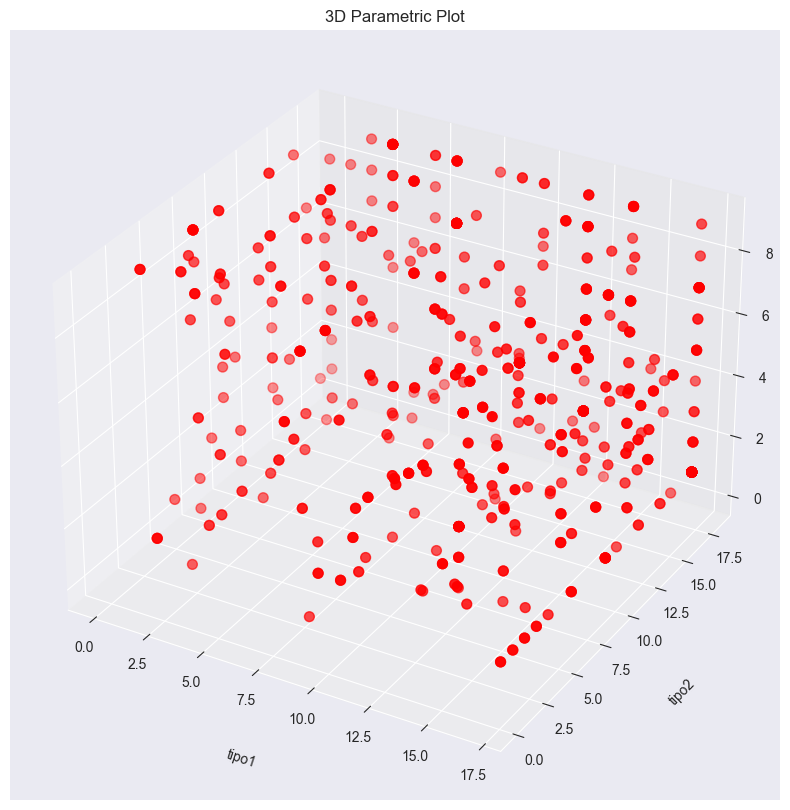

In [52]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter(tipo1, tipo2, cores, c = 'r' , s = 50)
ax.set_title('3D Parametric Plot')
ax.set_xlabel('tipo1', labelpad=20)
ax.set_ylabel('tipo2', labelpad=20)
ax.set_zlabel('cor', labelpad=20)

In [53]:
tipoum = []
tipodois = []

for i in range(0,len(tipo1)):
    tipoum.append(int(tipo1[i]))
    i += 1
    
for i in range(0,len(tipo2)):
    tipodois.append(int(tipo2[i]))
    i += 1

junta_tipos = list(zip(tipoum, tipodois))

tipos = [list(item) for item in junta_tipos]

tipos[34]

[4, 18]

Regressão Linear

In [54]:
# comandos para importar e realizar a regressão linear
regressao = linear_model.LinearRegression()
regressao.fit(tipos, cores)

a = regressao.coef_ # "a" é o coeficiente angular para a equação da reta
b = regressao.intercept_ # "b" é o coeficiente linear para a equação da reta

print("Coef Angular:", a, "Coef Linear:", b)

Coef Angular: [-0.11514677 -0.00616672] Coef Linear: 5.3177170856969145


In [60]:
regressao.predict([[3, 18]])

array([4.86127583])

In [61]:
# mostra a precisão da regressão linear
print(f"Precisão: {regressao.score(tipos, cores) * 100:.2f}%")

Precisão: 5.25%


KNN

In [56]:
# junta_tipos = list(zip(tipoum, tipoum))
# 
# tipos = [list(item) for item in junta_tipos]

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(tipos, pokedex.Color)

KNeighborsClassifier()

In [57]:
print((knn.predict([[3, 18]])))
print(knn.predict_proba([[3, 18]]))

['Yellow']
[[0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.6]]


In [62]:
# mostra a precisão do KNN
print(f"Precisão: {knn.score(tipos, pokedex.Color) * 100:.2f}%")

Precisão: 49.93%


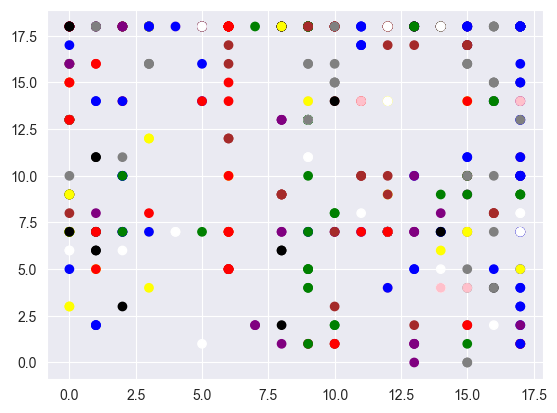

In [76]:
plt.scatter(tipoum, tipodois, c=pokedex.Color)

In [58]:
set(pokedex.Color)

{'Black',
 'Blue',
 'Brown',
 'Green',
 'Grey',
 'Pink',
 'Purple',
 'Red',
 'White',
 'Yellow'}

In [59]:
set(pokedex.Type_1)

{'Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water'}